<p style="color:#1B2430;background-color:#C689C6;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> 🏘️ Airbnb Listings EDA Plotly & Seaborn! 🏘️<span style='font-size:28px; background-color:#FFF9D7 ;'></span></p>

<center><img src="https://miro.medium.com/max/1400/0*NChTo-XqLOxLabIW" 
             style='border-radius:10px'></center>

# Table Of Contents

## [<b>1. INTRODUCTION</b>](#1)
## [<b>2. Load & Explore Airbnb Dataset</b>](#2)
## [<b>3. Preprocessing Airbnb Dataset</b>](#3)
## [<b>4. EDA Airbnb Dataset One</b>](#4)
## [<b>5. EDA Airbnb Dataset Two</b>](#5)
## [<b>6. To be Continued!</b>](#6)




<a id="1"></a> 

# <b>1 <span style='color:#FE5F64'>|</span> INTRODUCTION</b>

## <b>1.1 <span style='color:#FE5F64'>|</span> About Dataset</b>
This dataset provides data of Airbnb listings in the capital of Scotland, Edinburgh, for a period of one year, from 25 June 2019 to 24 June 2020.

The dataset contains 12 files, 2 of which are original and the rest 10 are processed. The original data are uncleaned web-scraped data, which can be used for data cleaning, data engineering, exploratory data analysis (EDA), followed by any algorithms a user finds suitable. On the other hand, the preprocessed data are provided for users who want to quickly run some regression algorithms without spending time on other aspects of a project.

## <b>1.1 <span style='color:#FE5F64'>|</span> Original Data</b>
Select your features, clean your data, then EDA or applying algorithms you find suitable.

**original_data_listings.csv (13,245 rows, 106 columns)**
* Contains data about 13245 properties listed on Airbnb for the period of data collection. 106 fields about the listings are provided, such as the number of bedrooms, neighbourhood, cancellation policy,   cleaning fee (averaged over the period of data collection as hosts can change how much they charge for cleaning), etc.

**Original_data_calendar.csv (4,834,568 rows, 7 columns)**
* Contains the status data of each property on each day over the period of data collection, such as, on a given date, whether the property was occupied and the price per night.


<a id="2"></a> 
# <b>2 <span style='color:#FE5F64'>|</span> Load & Explore Airbnb Dataset</b>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.io as pio

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
air_data_cal = pd.read_csv('../input/edinburgh-airbnb-data/original_data_calendar.csv')

In [3]:
air_data_listings  = pd.read_csv('../input/edinburgh-airbnb-data/origianl_data_listings.csv', 
                                 usecols = ['id','name', 'host_id', 'host_name', 'neighbourhood_group_cleansed', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 
                                           'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'host_identity_verified', 'street', 'city', 'state',
                                           'market', 'accommodates', 'review_scores_rating'], low_memory=False)

In [4]:
air_data_cal.head(5) # We can run head, tail and sample operation to get an idea of our dataset

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,568026,2019-06-25,f,$64.00,$64.00,3.0,60.0
1,327159,2019-06-25,t,$113.00,$113.00,1.0,1.0
2,327159,2019-06-26,t,$113.00,$113.00,1.0,56.0
3,327159,2019-06-27,t,$113.00,$113.00,1.0,56.0
4,327159,2019-06-28,t,$113.00,$113.00,1.0,56.0


In [5]:
air_data_listings.head(5) # We can run head, tail and sample operation to get an idea of our dataset

,id,name,host_id,host_name,host_identity_verified,street,neighbourhood,neighbourhood_group_cleansed,city,state,...,longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,NaN,Edinburgh,City of Edinburgh,...,-3.18768,Entire home/apt,2,$80.00,3,283,2019-06-23,99.0,1,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,f,"Edinburgh, EH8 9JW, United Kingdom",Southside,NaN,Edinburgh,EH8 9JW,...,-3.18467,Entire home/apt,4,$115.00,2,199,2019-06-19,92.0,1,1.86
2,38628,Edinburgh Holiday Let,165635,Trish,t,"Edinburgh, City of Edinburgh, United Kingdom",NaN,NaN,Edinburgh,City of Edinburgh,...,-3.09525,Entire home/apt,2,$46.00,4,52,2019-05-29,94.0,2,0.85
3,44552,Double room - spacious Leith flat,195950,Shaun,t,"Edinburgh, City of Edinburgh, United Kingdom",Leith,NaN,Edinburgh,City of Edinburgh,...,-3.17241,Private room,2,$32.00,2,184,2019-06-04,93.0,1,1.71
4,47616,"City flat, close to nature and the Fringe",216203,Ben,t,"Edinburgh, City of Edinburgh, United Kingdom",Southside,NaN,Edinburgh,City of Edinburgh,...,-3.17851,Private room,2,$100.00,1,32,2019-05-26,98.0,1,0.84


<a id="3"></a> 
# <b>3 <span style='color:#FE5F64'>|</span> Preprocessing Airbnb Dataset</b>

## <b> Calendar Data </b>

<AxesSubplot:>

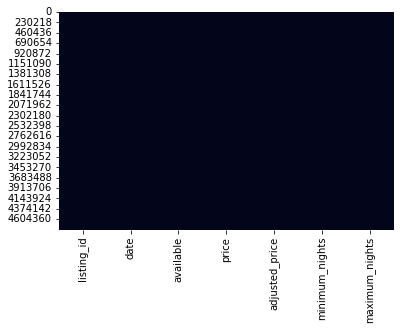

In [6]:
# Plot to see null values in our data
sns.heatmap(air_data_cal.isnull(), cbar=False)

In [7]:
# Null Value Percentage Per column
percent_missing = air_data_cal.isnull().sum() * 100 / len(air_data_cal)
missing_value_df = pd.DataFrame({'column_name': air_data_cal.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
listing_id,listing_id,0.000000
date,date,0.000000
available,available,0.000000
price,price,0.000000
adjusted_price,adjusted_price,0.000000
minimum_nights,minimum_nights,0.000372
maximum_nights,maximum_nights,0.000372


In [8]:
# Checking number of null values
air_data_cal.isna().sum().sum()

36

### There is very tiny amount of null values in our dataset so we will remove thoes and move ahead.

In [9]:
air_data_cal.dropna(axis=0,inplace=True)

### Date column should be of type datetime and not an object. 
### We can also create multiple other columns from date column for our EDA and it can also be helpul for building our model later on.

In [10]:
# See if all the datatypes are correct 
air_data_cal.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [11]:
# Change date column to datetime type and create year, month and day column as well
air_data_cal['date'] = pd.to_datetime(air_data_cal['date'])
air_data_cal['year'] = air_data_cal['date'].dt.year
air_data_cal['month'] = air_data_cal['date'].dt.month
air_data_cal['day'] = air_data_cal['date'].dt.day
air_data_cal['dayOfWeek'] = air_data_cal['date'].dt.weekday # The day of the week with Monday=0, Sunday=6.
air_data_cal['Weekday_Name'] = air_data_cal['date'].dt.day_name()

In [12]:
air_data_cal['Month_Name'] = air_data_cal['date'].dt.month_name()

In [13]:
air_data_cal['price'] = air_data_cal['price'].str.replace('$','')
air_data_cal['price'] = air_data_cal['price'].str.replace(',','')

In [14]:
air_data_cal['price'] = [x.split('.')[0] for x in air_data_cal['price']]

In [15]:
air_data_cal['price'] = air_data_cal['price'].astype(str).astype(int)

In [16]:
air_data_cal['adjusted_price'] = air_data_cal['adjusted_price'].str.replace('$',' ')
air_data_cal['adjusted_price'] = air_data_cal['adjusted_price'].str.replace(',','')

In [17]:
air_data_cal['adjusted_price'] = [x.split('.')[0] for x in air_data_cal['adjusted_price']]

In [18]:
air_data_cal['adjusted_price'] = air_data_cal['adjusted_price'].astype(str).astype(int)

## <b> Listings Data </b>

In [19]:
air_data_listings.sample(3)  # We can run head, tail and sample operation to get an idea of our dataset

,id,name,host_id,host_name,host_identity_verified,street,neighbourhood,neighbourhood_group_cleansed,city,state,...,longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
9948,27419887,Ideal based Tenement in Morningside for 4,174502310,Vivien,f,"Edinburgh, Scotland, United Kingdom",Morningside,NaN,Edinburgh,Scotland,...,-3.20925,Entire home/apt,4,$100.00,2,17,2019-06-14,96.0,3,1.58
2622,10291275,Studio Flat Edinburgh Free parking,9956902,Anthony,t,"Edinburgh, Scotland, United Kingdom",Leith,NaN,Edinburgh,Scotland,...,-3.17463,Entire home/apt,2,$45.00,2,83,2019-06-20,95.0,1,2.04
2842,11747006,Edinburgh Castle Suites,62500353,Edinburgh Castle Apartments & Suite,f,"Edinburgh, United Kingdom",New Town,NaN,Edinburgh,NaN,...,-3.20265,Entire home/apt,2,$135.00,1,142,2019-06-10,96.0,3,3.71


<AxesSubplot:>

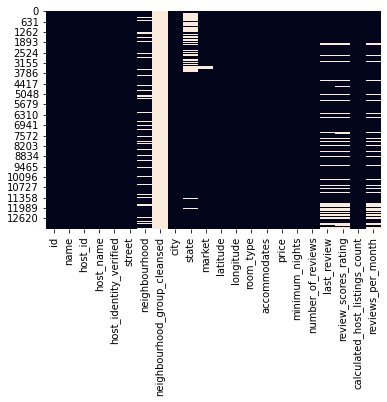

In [20]:
# Plot to see null values in our data
sns.heatmap(air_data_listings.isnull(), cbar=False)

In [21]:
# Null Value Percentage Per column
percent_missing = air_data_listings.isnull().sum() * 100 / len(air_data_listings)
missing_value_df = pd.DataFrame({'column_name': air_data_listings.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing' , ascending=False)

,column_name,percent_missing
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.000000
state,state,19.252548
neighbourhood,neighbourhood,17.319743
review_scores_rating,review_scores_rating,16.436391
reviews_per_month,reviews_per_month,15.341638
last_review,last_review,15.341638
market,market,1.547754
host_name,host_name,0.143450
host_identity_verified,host_identity_verified,0.143450
city,city,0.120800


In [22]:
# neighbourhood_group_cleansed has 100 percent Null values so we will be dropping that column 
air_data_listings = air_data_listings.drop(['neighbourhood_group_cleansed'], axis = 1) 

### Replacing Null ratings with AVG ratings of the Host.

In [23]:
air_data_listings['review_scores_rating'].fillna(air_data_listings.groupby('host_name')['review_scores_rating'].transform('mean'), inplace=True)

In [24]:
air_data_listings['reviews_per_month'] = air_data_listings['reviews_per_month'].fillna(air_data_listings['reviews_per_month'].median())

<AxesSubplot:>

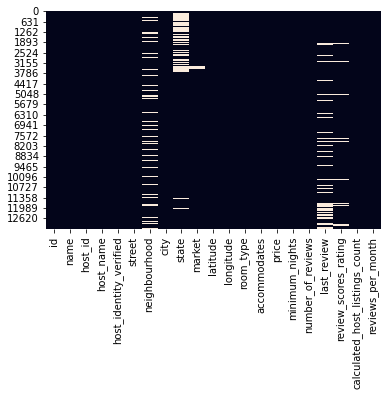

In [25]:
# Plot to see null values in our data
sns.heatmap(air_data_listings.isnull(), cbar=False)

### Taking Care of Data Types

In [26]:
air_data_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
host_identity_verified             object
street                             object
neighbourhood                      object
city                               object
state                              object
market                             object
latitude                          float64
longitude                         float64
room_type                          object
accommodates                        int64
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
review_scores_rating              float64
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

In [27]:
air_data_listings['last_review'] = pd.to_datetime(air_data_listings['last_review'])

In [28]:
air_data_listings['price'] = air_data_listings['price'].str.replace('$','')
air_data_listings['price'] = air_data_listings['price'].str.replace(',','')

In [29]:
air_data_listings['price'] = [x.split('.')[0] for x in air_data_listings['price']]

In [30]:
air_data_cal['price'] = air_data_cal['price'].astype(str).astype(int)

<a id="4"></a> 
# <b>4 <span style='color:#FE5F64'>|</span> EDA Airbnb Dataset One</b>

In [31]:
air_data_cal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day,dayOfWeek,Weekday_Name,Month_Name
0,568026,2019-06-25,f,64,64,3.0,60.0,2019,6,25,1,Tuesday,June
1,327159,2019-06-25,t,113,113,1.0,1.0,2019,6,25,1,Tuesday,June
2,327159,2019-06-26,t,113,113,1.0,56.0,2019,6,26,2,Wednesday,June
3,327159,2019-06-27,t,113,113,1.0,56.0,2019,6,27,3,Thursday,June
4,327159,2019-06-28,t,113,113,1.0,56.0,2019,6,28,4,Friday,June


In [32]:
air_data_cal.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                      int64
adjusted_price             int64
minimum_nights           float64
maximum_nights           float64
year                       int64
month                      int64
day                        int64
dayOfWeek                  int64
Weekday_Name              object
Month_Name                object
dtype: object

## Correlation Heatmap

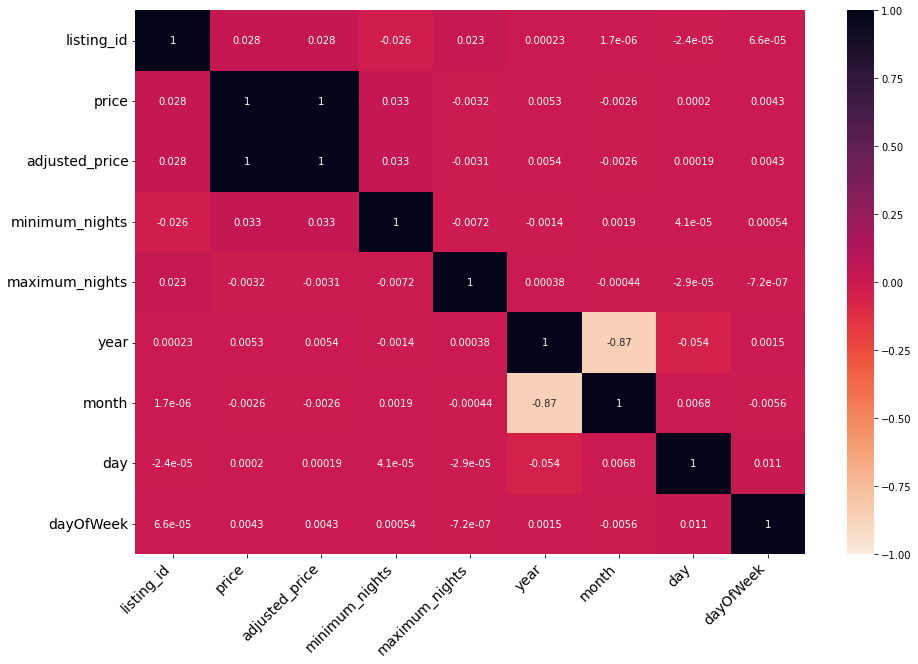

In [33]:
plt.figure(figsize=(15,10))
data = air_data_cal.corr()
ax = sns.heatmap(
    data,
    vmin=-1, vmax=1, 
    cmap='rocket_r', 
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right', size=14
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    size=14
);

In [34]:
data = air_data_cal
AVG_Price_Month = data[['Month_Name','maximum_nights', 'minimum_nights', 'price']].groupby(['Month_Name']).mean().reset_index().sort_values('price', ascending = False)

In [35]:
AVG_Price_Month

,Month_Name,maximum_nights,minimum_nights,price
1,August,606.434774,3.112848,143.296389
8,May,606.527970,3.023736,127.887636
2,December,605.809150,3.131477,126.393064
0,April,606.321278,3.025519,126.383322
3,February,606.409966,3.061074,125.191047
6,June,606.550085,2.959714,124.848013
4,January,606.324020,3.071292,124.783127
7,March,606.372440,3.040193,124.499327
11,September,605.781643,3.101875,120.464404
9,November,605.762617,3.125386,118.602529


## Trend of Price Across Months

In [36]:
fig = px.bar(AVG_Price_Month, x='Month_Name', y='price', template = 'plotly_white', title='Trend of Price Across Months', color='price', height=800)
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

## Scatter Plot of cross Max-Min Nights and Price

In [37]:
fig = px.scatter(AVG_Price_Month, x="maximum_nights", y="minimum_nights", color="price",
                 size='price', hover_data=['maximum_nights', 'minimum_nights', 'price', 'Month_Name'], template = 'plotly_white', 
                 title='Scatter Plot of cross Max-Min Nights and Price')
fig.show()

In [38]:
data = air_data_cal
AVG_Price_Weekday = data[['Weekday_Name','maximum_nights', 'minimum_nights', 'price']].groupby(['Weekday_Name']).mean().reset_index().sort_values('price', ascending = False)

In [39]:
AVG_Price_Weekday

,Weekday_Name,maximum_nights,minimum_nights,price
2,Saturday,606.197568,3.083420,129.105185
0,Friday,606.201519,3.080650,128.280164
3,Sunday,606.193161,3.051284,122.900408
4,Thursday,606.188910,3.053986,122.203801
5,Tuesday,606.267748,3.044371,121.964911
1,Monday,606.182853,3.049268,121.942743
6,Wednesday,606.095941,3.048372,121.520175


## Trend of Price across different Weekdays

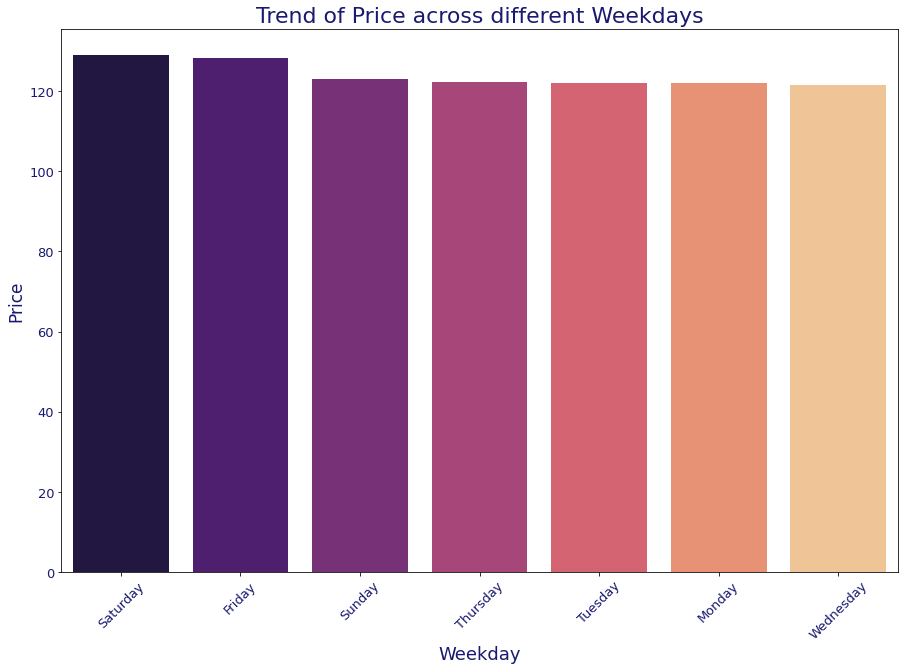

In [40]:
plt.figure(figsize=(15,10))
ax_1 = sns.barplot(x='Weekday_Name', y='price', data=AVG_Price_Weekday, palette='magma')

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Weekday', size = 18, color='midnightblue')
plt.ylabel('Price', size = 17 , color='midnightblue')
plt.title('Trend of Price across different Weekdays', size = 22 , color='midnightblue')
plt.show()

In [41]:
fig = px.scatter(AVG_Price_Weekday, x="maximum_nights", y="minimum_nights", color="price",
                 size='price', hover_data=['maximum_nights', 'minimum_nights', 'price', 'Weekday_Name'], template = 'plotly_white', 
                 title='Scatter Plot of cross Max-Min Nights and Price in weekdays')
fig.show()

<a id="5"></a> 
# <b>5 <span style='color:#FE5F64'>|</span> EDA Airbnb Dataset Two</b>

In [42]:
air_data_listings.head(3)

,id,name,host_id,host_name,host_identity_verified,street,neighbourhood,city,state,market,...,longitude,room_type,accommodates,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,Edinburgh,City of Edinburgh,Edinburgh,...,-3.18768,Entire home/apt,2,80,3,283,2019-06-23,99.0,1,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,f,"Edinburgh, EH8 9JW, United Kingdom",Southside,Edinburgh,EH8 9JW,Edinburgh,...,-3.18467,Entire home/apt,4,115,2,199,2019-06-19,92.0,1,1.86
2,38628,Edinburgh Holiday Let,165635,Trish,t,"Edinburgh, City of Edinburgh, United Kingdom",NaN,Edinburgh,City of Edinburgh,Edinburgh,...,-3.09525,Entire home/apt,2,46,4,52,2019-05-29,94.0,2,0.85


In [43]:
#List all unique room types
for elem in air_data_listings['room_type'].unique():
    print(elem)

Entire home/apt
Private room
Shared room


## Room Types Bar Chart

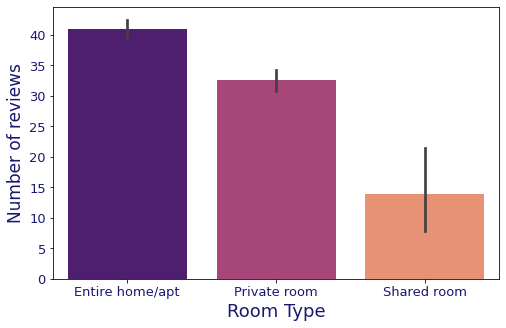

In [44]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='room_type', y='number_of_reviews', data=air_data_listings, palette='magma')
plt.xticks(fontsize=13, color='midnightblue')
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Room Type', size = 18, color='midnightblue')
plt.ylabel('Number of reviews', size = 17 , color='midnightblue')
plt.show()

In [45]:
#List all unique room types
for elem in air_data_listings['neighbourhood'].unique():
    print(elem)

New Town
Southside
nan
Leith
Old Town
West End
Haymarket
Morningside
Newington
Marchmont
Cannonmills
Tollcross
Bruntsfield
Stockbridge


## Total Number of Reviews against Neighbourhoods

Text(0.5, 1.0, 'Total Number of Reviews against Neighbourhoods')

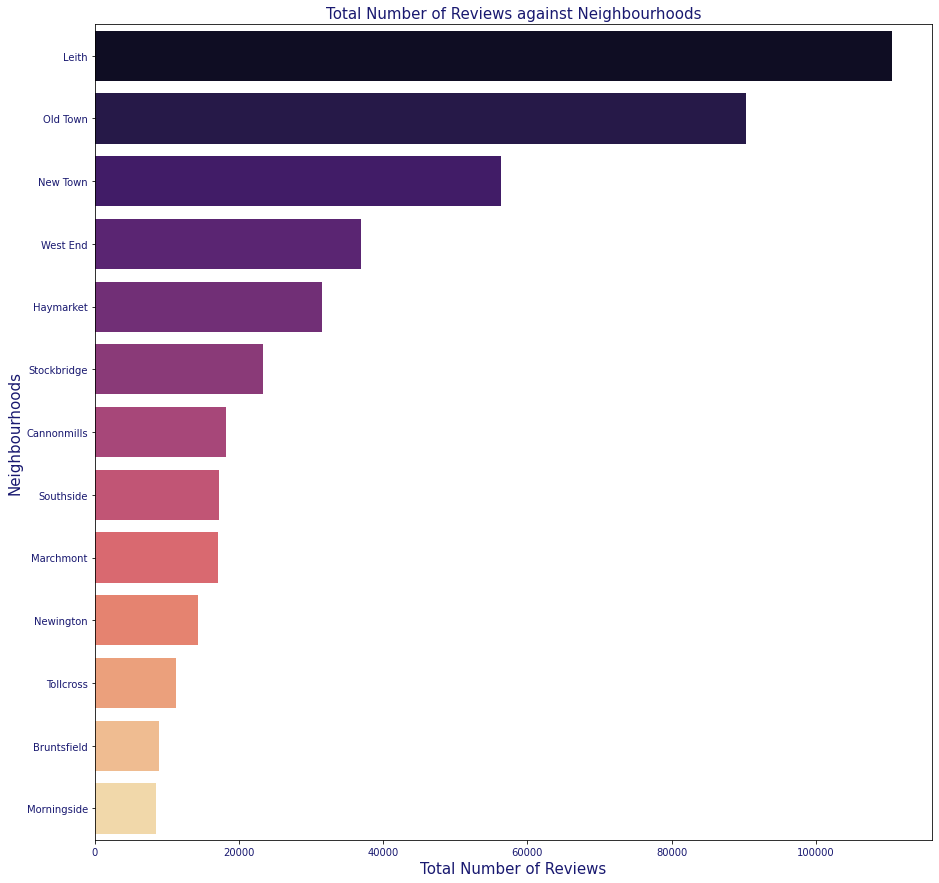

In [46]:
data = air_data_listings
pfa = data[['neighbourhood','number_of_reviews']].groupby(['neighbourhood']).sum().reset_index().sort_values('number_of_reviews', ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(y = 'neighbourhood', x = 'number_of_reviews', data = pfa, palette = 'magma')
plt.xlabel('Total Number of Reviews', size = 15, color='midnightblue')
plt.ylabel('Neighbourhoods', size = 15, color='midnightblue')
plt.xticks(color='midnightblue')
plt.yticks(color='midnightblue')
plt.title('Total Number of Reviews against Neighbourhoods', size = 15, color='midnightblue')

In [47]:
data = air_data_listings
city_df = data[['city','number_of_reviews']].groupby(['city']).sum().reset_index().sort_values('number_of_reviews', ascending = False)

In [48]:
city_dfa = city_df.head(10)
fig = px.bar(city_dfa, x='city', y='number_of_reviews', template = 'plotly_white', title='Top 10 Cities WRT Rating', color='number_of_reviews', height=800)
fig.update_xaxes(rangeselector_font_size=8)
fig.show()

In [49]:
data = air_data_listings
state_df = data[['state','number_of_reviews']].groupby(['state']).sum().reset_index().sort_values('number_of_reviews', ascending = False)

In [50]:
state_dfa = state_df.head(10)
fig = px.bar(state_dfa, x='state', y='number_of_reviews', template = 'plotly_white', title='Top 10 States WRT Rating', color='number_of_reviews', height=800)
fig.update_xaxes(rangeselector_font_size=8)
fig.show()

<a id="6"></a> 
# <b>6 <span style='color:#FE5F64'>|</span> To be Continued! </b>

<img src="https://images.unsplash.com/photo-1447968954315-3f0c44f7313c?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80" 
             style='border-radius:10px'>